# Visualizing Geographic Data About Airports

In fields like meteorology and and climatology, geographic data plays a crucial role in understanding the Earth's systems. Besides its prevalence in scientific fields, geographic data powers our mapping and navigation software like Google Maps and allows us to see where our friends and family are on Facebook and Foursquare. Geographic data like latitudes and longitudes are difficult to understand using the data charts and plots. To explore this kind of data, we'll need to learn how to visualize the data on maps.

We'll learn the fundamentals of geographic coordinate systems and how to work with the Basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights](http://openflights.org/data.html) website.

## Geographic Data

In [32]:
import pandas as pd

airlines = pd.read_csv('airlines.csv')

airports = pd.read_csv('airports.csv')
airports.columns = ['Airport ID', 'From', 'To', 'Country', 
                    'IATA/FAA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 
                    'Timezone', 'DST','Tz database time zone']

routes  = pd.read_csv('routes.csv')


## Geographic Coordinate Systems
A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

- Latitude values

    - describe the North-South position
    - degrees as the unit
    - ranges from -90 to 90 degrees
    
    
- Longitude values

    - describe the East-West position
    - degrees as the unit
    - ranges from -180 to 180 degrees

To explore data, it's usually best to plot data on 2D maps. 2D maps are faster to render, are easier to distribute since they can be easily exported as an image, and also match the familiar experience of popular mapping applications, like Google Maps. Since latitude and longitude values describe points on a sphere, we need to convert them to x and y coordinates so we can plot them on a 2D map.

To convert the values from the spherical coordinate system (which is in 3 dimensions) to the cartesian coordinate system (which is in 2 dimensions), we need to use a map projection. There are many projections you can use and the differences are out of scope for this mission. We'll use the Mercator projection, since it is commonly used by mapping applications like Google Maps, Apple Maps, and MapQuest.

## Basemap
Before we convert our flight data to cartesian coordinates and plot it, let's learn more about the Basemap toolkit. Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The documentation for Basemap provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.

Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While Basemap uses Matplotlib to actually draw and control the map, the library provides many high-level methods that enable us to work with maps quickly. 

In [37]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from mpl_toolkits.basemap import Basemap
%matplotlib inline
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)

## Converting From Spherical To Cartesian Coordinates
As mentioned before, we need to convert latitude and longitude values to cartesian coordinates to display them on a 2D map. We can pass in a List of latitude and longitude values into the Basemap instance and it will return back a converted list of latitude and longitude values using the projection we specified earlier.

In the following code, we use the Series method tolist() to convert the longitude and latitude columns from the airports DataFrame from Series objects to List objects. Then, we pass them into the Basemap instance in the following order:

- list of longitude values first.
- list of latitude values second.

The Basemap object will return 2 List objects, which we assign to x and y. Finally, we display the first 5 elements of the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.

In [38]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

# Convert from Series objects to List objects.
longitudes = airports["Longitude"].tolist()
latitudes = airports["Latitude"].tolist()

# Convert latitude and longitude to x and y coordinates.
x, y = m(longitudes, latitudes)

# Display original longitude values
print(longitudes[0:5])
# Display original latitude values
print(latitudes[0:5])
# Display x-axis coordinates
print(x[0:5])
# Display y-axis coordinates
print(y[0:5])


[145.78870000000001, 144.295861, 146.72624199999998, 147.22004999999999, 143.669186]
[-5.2070829999999999, -5.8267889999999998, -6.5698280000000002, -9.4433830000000007, -3.583828]
[36226033.539869711, 36060037.494937442, 36330283.404696316, 36385192.323177092, 35990354.447095089]
[14941516.685582709, 14872287.531036133, 14789178.970177783, 14466473.84037962, 15122552.886919565]


## Generating A Scatter Plot
Now that the data is in the right format, you can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of x and y coordinates, use the Basemap method scatter().

The Basemap method scatter() uses the same arguments as the matplotlib.pyplot method scatter(). After we've created the scatter plot, we'll use plt.show() to display the plot. We'll dive more into customizing the plot in the next step but now, let's create a simple scatter plot.

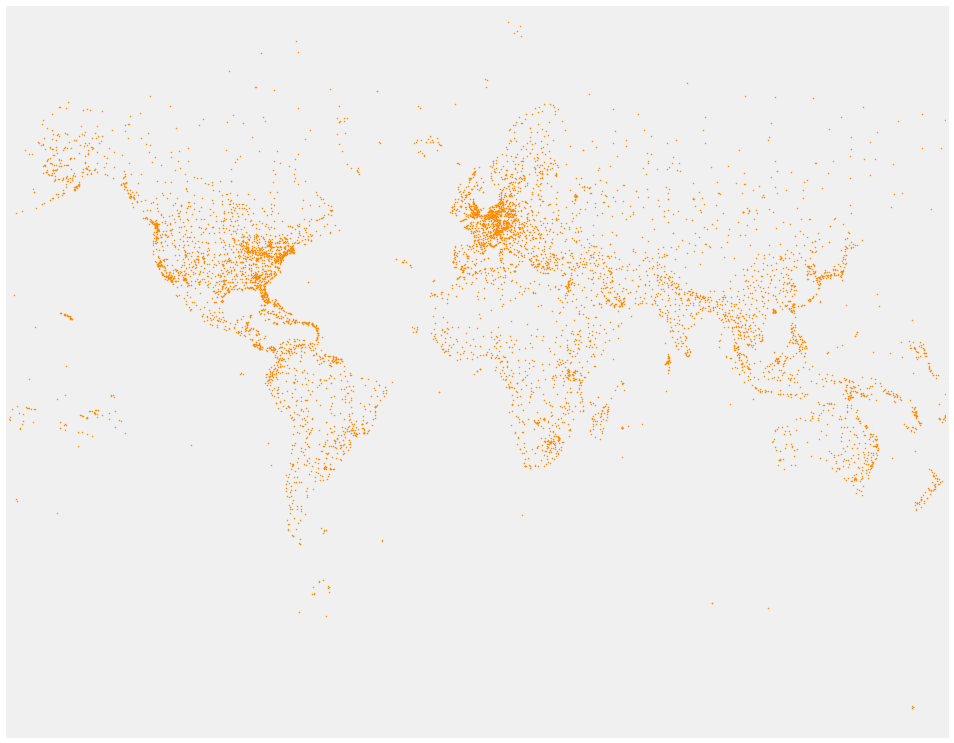

In [42]:
plt.figure(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
# Use matplotlib to draw the points onto the map.
m.scatter(x, y, s=1, color = 'DarkOrange')

plt.show()

## Customizing The Plot Using Basemap
We notice that the outlines of thee coasts for each continent are missing from the map above. As we mentioned earlier, we can use methods from the Basemap class to tweak the map. To display the coast lines, we can use the drawcoastlines() method.

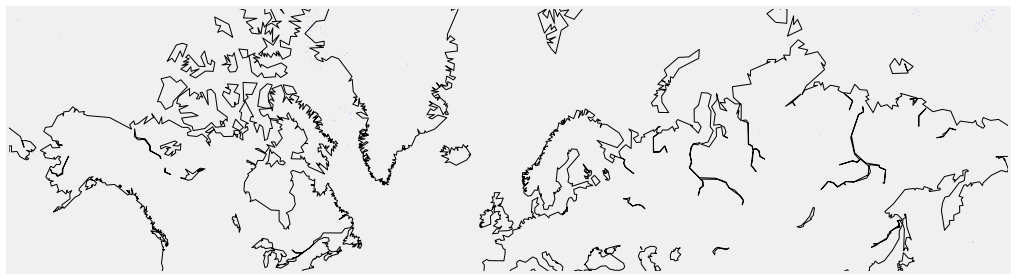

In [43]:
plt.figure(figsize=(16,12))
m = Basemap(projection='merc', llcrnrlat=40.496044, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["Longitude"].tolist()
latitudes = airports["Latitude"].tolist()
m.scatter(x, y, s=1)
x, y = m(longitudes, latitudes)
m.drawcoastlines()
plt.show()

## Customizing The Plot Using Matplotlib
Since Basemap uses Matplotlib under the hood, we can take advantage of the Matplotlib classes to customize our map.

To increase the size of the map, you can create a new Figure instance and specify the figsize parameter before creating the Basemap instance.

We can create a new subplot by:

- calling the add_subplot() method on the Figure instance,
- assigning the returned Axes instance to a variable,
- and then call the set_title() method method on that Axes instance to set the title of the map.

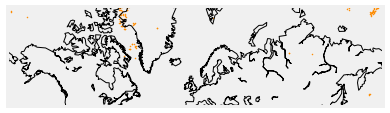

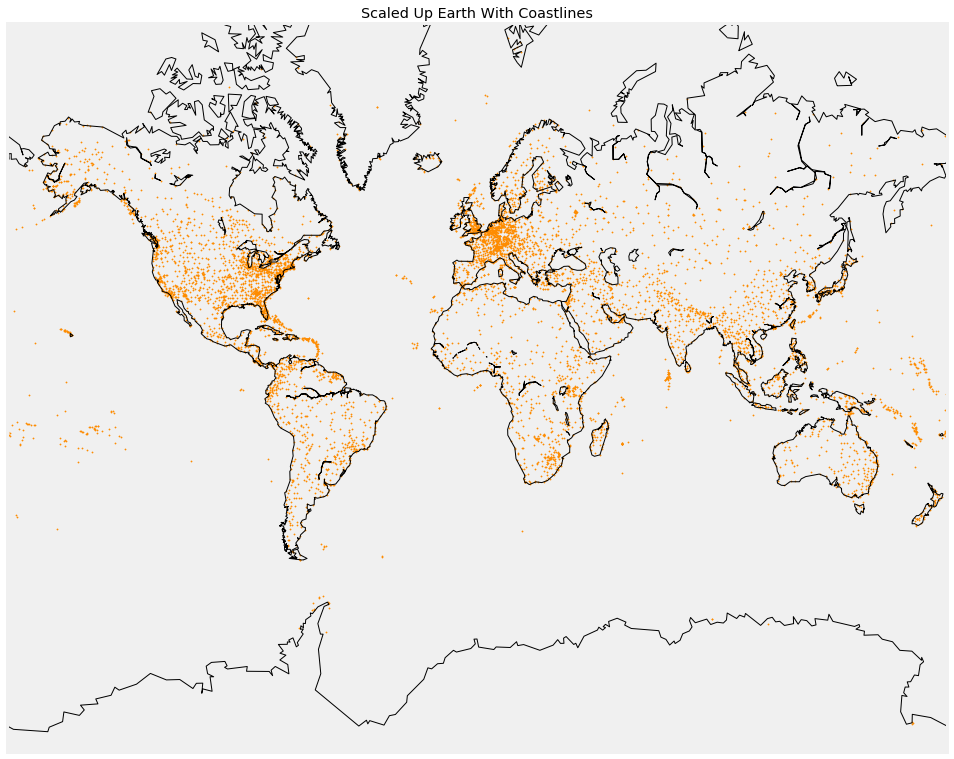

In [49]:
m = Basemap(projection='merc', llcrnrlat=40.496044, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["Longitude"].tolist()
latitudes = airports["Latitude"].tolist()
m.scatter(x, y, s=1, color = 'DarkOrange')
x, y = m(longitudes, latitudes)
m.drawcoastlines()
plt.show()
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(1,1,1)
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["Longitude"].tolist()
latitudes = airports["Latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1.5, color = 'DarkOrange')
m.drawcoastlines()
plt.show()